In [1]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv("C:\\Users\\tusha\\Downloads\\CAR DETAILS FROM CAR DEKHO (1).csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
df.shape

(4340, 8)

# Exploratory Data Analysis(EDA)

In [21]:
df.name

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

In [23]:
df.name.str.split().str[0] .unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [25]:
df.name.str.split().str[0] .unique().shape

(29,)

In [27]:
#hence we have 29 unique brands in the dataset

In [39]:
#taking a few common brands to check which brand is most common
a,b,c,d,e,f,g,h,i,j=0,0,0,0,0,0,0,0,0,0
for x in df['name']:
  if "Maruti" in x:
    a+=1
  elif "Hyundai" in x:
    b+=1
  elif "Nissan" in x:
    c+=1
  elif "Toyota" in x:
    d+=1
  elif "Renault" in x:
    e+=1
  elif "Honda" in x:
    f+=1
  elif "Ford" in x:
    g+=1
  elif "Tata" in x:
    h+=1
  elif "BMW" in x:
    i+=1
  elif "Audi" in x:
    j+=1
z=[]
z=[a,b,c,d,e,f,g,h,i,j]
print(z)

[1280, 821, 64, 206, 153, 252, 238, 361, 39, 60]


In [37]:
#hence most common car brands are Maruti and Hyundai

In [46]:
b=df
b['brand_name']=df.name.str.split().str[0]
b.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [48]:
brand_c=b['brand_name'].value_counts()
brand_c

brand_name
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [50]:
import matplotlib.pyplot as plt

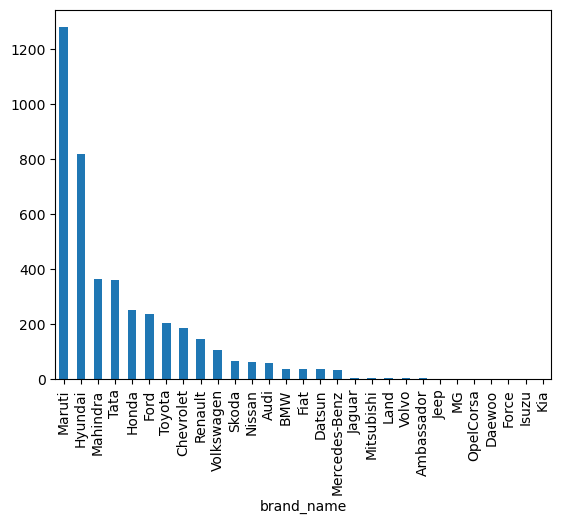

In [52]:
brand_c.plot(kind = 'bar')
plt.show()

In [54]:
non_num_c = b.select_dtypes(exclude=['number']).columns
non_num_c

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand_name'], dtype='object')

In [56]:
df1=b
for c in  non_num_c :
    df1[c]= df1[c].astype('category').cat.codes
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
0,775,2007,60000,70000,4,1,1,0,18
1,1041,2007,135000,50000,4,1,1,0,18
2,505,2012,600000,100000,1,1,1,0,10
3,118,2017,250000,46000,4,1,1,0,5
4,279,2014,450000,141000,1,1,1,2,9


In [58]:
n=df1.select_dtypes(include=np.number)
correlation=n.corr()
correlation

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
name,1.000000,-0.051902,-0.077598,0.126203,-0.083927,0.140802,0.087785,0.032819,0.974513
year,-0.051902,1.000000,0.413922,-0.419688,-0.120002,-0.098352,-0.143800,-0.414705,-0.039724
selling_price,-0.077598,0.413922,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.096858
km_driven,0.126203,-0.419688,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.131461
fuel,-0.083927,-0.120002,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,-0.109534
seller_type,0.140802,-0.098352,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.144218
transmission,0.087785,-0.143800,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.110699
owner,0.032819,-0.414705,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.036452
brand_name,0.974513,-0.039724,-0.096858,0.131461,-0.109534,0.144218,0.110699,0.036452,1.000000


In [60]:
import seaborn as sb

<Axes: title={'center': 'Correlation'}>

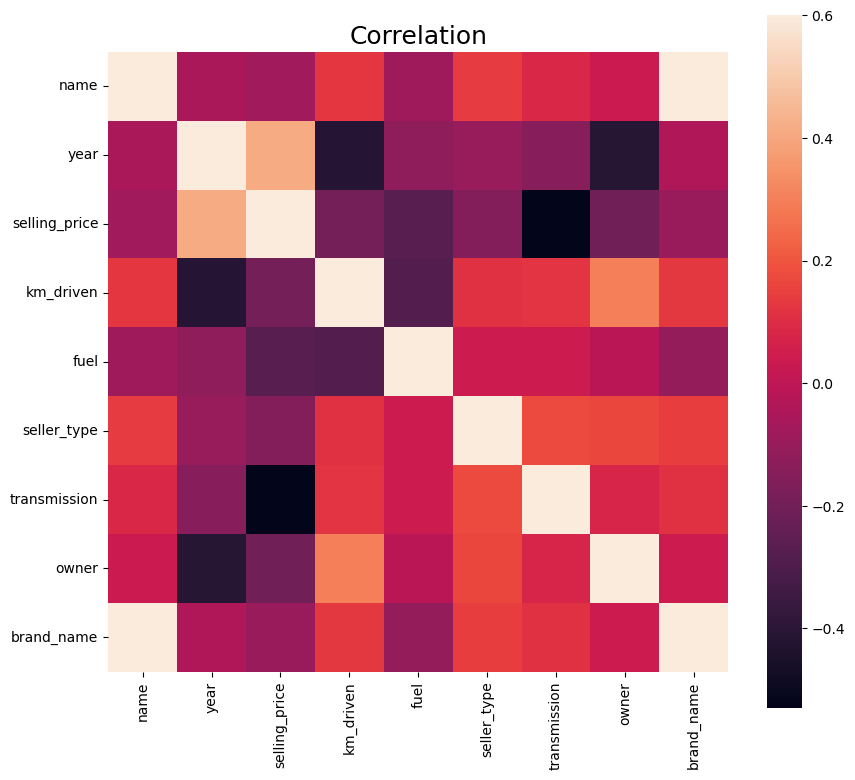

In [70]:
f,axis=plt.subplots(figsize=(10,9))
plt.title("Correlation",y=1,size=18)
sb.heatmap(correlation,vmax=.6,square=True)

In [66]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
brand_name       0
dtype: int64

In [68]:
#hence no null value

# Preprocess the Data

In [73]:
df2 = b 
df2 = pd.get_dummies(df2, columns=non_num_c, drop_first=True)
df2.head()

,year,selling_price,km_driven,name_1,name_2,name_3,name_4,name_5,name_6,name_7,...,brand_name_19,brand_name_20,brand_name_21,brand_name_22,brand_name_23,brand_name_24,brand_name_25,brand_name_26,brand_name_27,brand_name_28
0,2007,60000,70000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2007,135000,50000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,600000,100000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,250000,46000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,450000,141000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
c_Scale = ['year' , 'km_driven']
df2[c_Scale] = s.fit_transform(df2[c_Scale])
df2.head()

,year,selling_price,km_driven,name_1,name_2,name_3,name_4,name_5,name_6,name_7,...,brand_name_19,brand_name_20,brand_name_21,brand_name_22,brand_name_23,brand_name_24,brand_name_25,brand_name_26,brand_name_27,brand_name_28
0,0.535714,60000,0.086783,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.535714,135000,0.061988,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.714286,600000,0.123976,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.892857,250000,0.057028,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.785714,450000,0.174807,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apply Linear Regression

In [78]:
from sklearn.model_selection import train_test_split
a = df2.drop('selling_price' , axis = 'columns')
b = df2['selling_price']
a_train ,a_test , b_train ,b_test = train_test_split(a , b , test_size=0.2 )

In [80]:
a_train.shape

(3472, 1531)

In [82]:
a_test.shape

(868, 1531)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [90]:
m = LinearRegression()
m.fit(a_train , b_train )

LinearRegression()

In [94]:
b_predict = m.predict(a_test)

In [100]:
sq_e = mean_squared_error(b_test, b_predict)
r2 = r2_score(b_test, b_predict)
sq_e

4.848776996342581e+35

In [102]:
r2

-2.3257055495927805e+24

In [104]:
a_test.head()

,year,km_driven,name_1,name_2,name_3,name_4,name_5,name_6,name_7,name_8,...,brand_name_19,brand_name_20,brand_name_21,brand_name_22,brand_name_23,brand_name_24,brand_name_25,brand_name_26,brand_name_27,brand_name_28
1176,0.892857,0.012397,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
444,0.678571,0.099181,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
337,0.357143,0.049590,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
345,0.928571,0.024794,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
688,0.714286,0.074385,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Insights

## Key findings

### Maruti and Hyundai are the most common brands

### Year and Transmission are most strongly correlated with the selling price

## Steps for Data Preprocessing

### There were no null values in the data set so data munging wasn't required

### Encoded categorical variables like brand

### Scaled km_driven and year by using MinMaxScaler

## Performance of the regression model


### Evaluated the model's performance using r2 metrics